In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import numpy as np
import bidi.algorithm
import arabic_reshaper
import adhtools.utils

In [42]:
fpath = '/media/sf_VBox_Shared/Arabic/Analyses/Fiqh_final2/topicmodeling/fiqh-light10-20/'

In [43]:
df_topics = pd.read_csv(os.path.join(fpath, 'fiqh_light10_topics_20_labeled.csv'), sep=';', index_col=0).fillna('')

In [44]:
df_topics['label'] = df_topics[['topic_level1', 'topic_level2']].apply(lambda r: ' - '.join([s for s in r if s!='']), axis=1)
df_topics

,0,1,2,3,4,5,6,7,8,9,topic_level1,topic_level2,label
topic,,,,,,,,,,,,,
0,اذ,دار,علي,قتل,امام,حرب,اهل,اسلام,ول,مسلم,public law,warfare,public law - warfare
1,يد,نفس,عمد,رجل,اذ,قصاص,قطع,ول,حد,قتل,public law,homicide; punishments,public law - homicide; punishments
2,سحن,اشهب,كتاب,مدون,ول,هذ,فل,اذ,مالك,قاسم,legal reasoning: Mālikīs,Mālikīs,legal reasoning: Mālikīs - Mālikīs
3,نجس,مسح,حيض,دم,نجاس,صلا,وض,اذ,ول,غسل,ritual law,purity; prayer,ritual law - purity; prayer
4,خيار,هذ,ول,بااع,اذ,قبض,عقد,ثمن,مشتر,بيع,private law,contracts: sales,private law - contracts: sales
5,هذ,سلام,ركع,وقت,اول,صل,ول,اذ,امام,صلا,ritual law,prayer,ritual law - prayer
6,عد,فل,مهر,ام,حد,اذ,نكاح,ول,طلاق,زوج,personal law,marriage,personal law - marriage
7,دم,طواف,محرم,احرام,عمر,حرم,اذ,صيد,ول,حج,ritual law,pilgrimage,ritual law - pilgrimage
8,هذ,حق,حد,يد,اذ,مدع,قاض,اقرار,ول,شهاد,procedural law,litigation; proof,procedural law - litigation; proof


In [45]:
document_topics = pd.read_csv(os.path.join(fpath, 'document_topics_20.csv'), index_col=0).sort_index()
#df_topics = pd.read_csv(os.path.join(fpath, 'fiqh_roots_topics_20.csv'), index_col=0)
metadata = pd.read_csv(os.path.join(fpath, '../../metadata-chapters.csv'), index_col=0)

In [46]:
topic_names = df_topics['label']

In [47]:
def split_fname(fname):
    splitted = fname.split('-')
    bookname = splitted[0]
    if len(splitted)>1:
        chapter = int(splitted[-1].split('.')[0])
    else:
        chapter = 0
    return (bookname, chapter)

In [48]:
metadata['filename'] = metadata.filename.astype(str)

In [49]:
metadata_newind = metadata
metadata_newind.index = pd.MultiIndex.from_tuples(metadata.filename.map(split_fname))

In [50]:
ind = metadata_newind.index
book_names = sorted(ind.levels[0])

In [51]:
largest_topics = pd.DataFrame(document_topics.idxmax(axis=1))#, index=metadata_newind.index)
largest_topics.index = metadata_newind.index

largest_topics = pd.concat((largest_topics,  metadata_newind['ChapterLength'], metadata_newind['Number_of_tokens']), axis=1)

#largest_topics.index = new_ind
largest_topics = largest_topics.reset_index()
largest_topics.columns = ['book', 'chapter', 'topic', 'length', 'total_length']

In [52]:
book_dict = {b: i for i,b in enumerate(book_names)}

In [53]:
metadata_newind['topic'] = largest_topics.set_index(['book', 'chapter'])['topic']
metadata_newind['topic_name'] = [topic_names[int(topic)] for topic in metadata_newind['topic']]
metadata_newind['topic_level1'] = [df_topics.topic_level1[int(topic)] for topic in metadata_newind['topic']]
metadata_newind['topic_level2'] = [df_topics.topic_level2[int(topic)] for topic in metadata_newind['topic']]

In [54]:
metadata_newind.to_csv(os.path.join(fpath, 'chapters_metadata_topics.csv'))

In [55]:
largest_topics['x1'] = largest_topics.groupby('book')['length'].transform(pd.Series.cumsum)
largest_topics['x0'] = largest_topics['x1'] - largest_topics['length']

In [56]:
largest_topics['total_length'] = largest_topics.groupby('book')['x1'].transform(lambda l: [l.max()]*len(l))

In [57]:
largest_topics['perc0'] = largest_topics['x0'] / largest_topics['total_length']
largest_topics['perc1'] = largest_topics['x1'] / largest_topics['total_length']

In [58]:
largest_topics['label'] = [topic_names[int(t)] for t in largest_topics['topic']]

In [59]:
largest_topics.to_csv(os.path.join(fpath, 'largest_topics_20.csv'), index=False)

create color palette based on the two levels

In [60]:
nested_topics = dict(df_topics.groupby('topic_level1').agg(set)['topic_level2'])

In [61]:
level1_counts = {k: len(nested_topics[k]) for k in nested_topics}

In [62]:
# Count the number of distincts topics per highest level
level1_counts

{'legal reasoning': 4,
 'legal reasoning: Mālikīs': 1,
 'legal reasoning: Shāfiʿīs': 1,
 'legal reasoning: Ḥanafīs': 1,
 'personal law': 2,
 'private law': 3,
 'procedural law': 1,
 'public law': 2,
 'ritual law': 5}

## Plot the topics

Each topic label gets a color assigned. Here we show the color per topic, in the table with the most important words per topic. The topics are sorted on label.

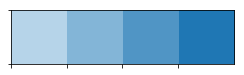

legal reasoning
legal reasoning - general; akhbār
legal reasoning - general; khilāf
legal reasoning - prophetic hadith and early authorities


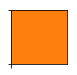

legal reasoning: Mālikīs - Mālikīs


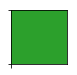

legal reasoning: Shāfiʿīs - Shāfiʿīs


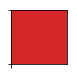

legal reasoning: Ḥanafīs - Ḥanafīs


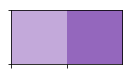

personal law - inheritance
personal law - marriage


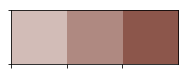

private law - contracts: property
private law - contracts: sales
private law - slaves


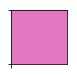

procedural law - litigation; proof


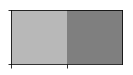

public law - homicide; punishments
public law - warfare


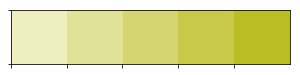

ritual law - alms; taxes
ritual law - oaths; fasting; expiation
ritual law - pilgrimage
ritual law - prayer
ritual law - purity; prayer


In [63]:
color_dict = {}
start_colors = sns.color_palette(n_colors=len(level1_counts))
for i, topic_lev1 in enumerate(nested_topics):
    if topic_lev1 != 'noise':
        c = start_colors[i] #tuple((np.random.random() for _ in range(3)))
        level2_counts = level1_counts[topic_lev1]
        cmap_sub = sns.light_palette(c, level2_counts+1)[1:]
        sns.palplot(cmap_sub)
        plt.show()
        for j, topic_lev2 in enumerate(sorted(nested_topics[topic_lev1])):
            label = topic_lev1
            if topic_lev2 != '':
                label+= ' - ' + topic_lev2
            color_dict[label] = cmap_sub[j]
            print(label)
            

In [64]:
#color_list = sns.color_palette(n_colors=len(topic_names))
# color_list = sns.color_palette("muted", n_colors=10) + sns.color_palette("dark", n_colors=10)
# color_dict = {label: color_list[i] for i,label in enumerate(topic_names)}
color_dict['noise'] = 'grey'

In [65]:
import matplotlib.colors

def style_row(row):
    topic_id = int(row.name)
    topic_name = row.label
    color = matplotlib.colors.to_hex(color_dict[topic_name])
    attr = 'background-color: {}'.format(color)
    return [attr for v in  row]
df_topics.sort_values(['topic_level1', 'topic_level2']).style.apply(style_row, axis=1)

,0,1,2,3,4,5,6,7,8,9,topic_level1,topic_level2,label
topic,,,,,,,,,,,,,
11,شيخ,بخلاف,كلام,ول,ظاهر,شرح,فل,اذ,اول,ذكر,legal reasoning,,legal reasoning
13,اصحاب,كلام,ظاهر,ذكر,شيخ,روا,اخبار,اب,هذ,سلام,legal reasoning,general; akhbār,legal reasoning - general; akhbār
14,ام,صحيح,ول,ثان,اصل,اجماع,مطلق,عدم,اول,خلاف,legal reasoning,general; khilāf,legal reasoning - general; khilāf
16,ابو,رجل,شافع,نب,حديث,مالك,عمر,رسول,اب,صل,legal reasoning,prophetic hadith and early authorities,legal reasoning - prophetic hadith and early authorities
2,سحن,اشهب,كتاب,مدون,ول,هذ,فل,اذ,مالك,قاسم,legal reasoning: Mālikīs,Mālikīs,legal reasoning: Mālikīs - Mālikīs
12,ذكر,مذهب,احدهم,ول,وجه,شافع,ابو,فصل,مسال,ثان,legal reasoning: Shāfiʿīs,Shāfiʿīs,legal reasoning: Shāfiʿīs - Shāfiʿīs
9,وكذ,حق,فل,يوسف,حنيف,بخلاف,اب,ذكر,هذ,اذ,legal reasoning: Ḥanafīs,Ḥanafīs,legal reasoning: Ḥanafīs - Ḥanafīs
17,موص,ورث,ثلاث,نصف,عشر,ام,مال,اب,وص,ثلث,personal law,inheritance,personal law - inheritance
6,عد,فل,مهر,ام,حد,اذ,نكاح,ول,طلاق,زوج,personal law,marriage,personal law - marriage


In [66]:
def plot_bar_per_book(largest_topics, xmin_col, xmax_col, book_names, topic_names, legend=True):
    book_dict = {b: i for i,b in enumerate(book_names)}

    plt.figure(figsize=(25, np.floor(len(book_names)*0.5)))
    ax = plt.gca()
    for topic_name in sorted(topic_names):
        largest_topics_sub = largest_topics[largest_topics['label']==topic_name]
        #color = color_list[topic] 
        color = color_dict[topic_name]

        y = [book_dict[s] for s in largest_topics_sub['book']]
        #x = largest_topics_sub['chapter']
        xmin = largest_topics_sub[xmin_col]
        xmax = largest_topics_sub[xmax_col]
        if topic_name != 'noise':
            ax.hlines(y, xmin, xmax, #marker='s', edgecolors=None, 
                      colors=np.array((color,)), lw=10,
                       label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_name)))
    ax.set_yticks(np.arange(len(book_dict)))
    ax.set_yticklabels(book_names)
    ax.set_xlim(0, largest_topics[xmax_col].max())
    ax.set_ylim(-0.5, len(book_names))
    if legend:
        plt.legend(fontsize='large')
    ax.invert_yaxis()
    #ax.set_facecolor('black')
    plt.show()

We plot the topics per book, based on the absolute length (in number of tokens) of the chapters in the book.

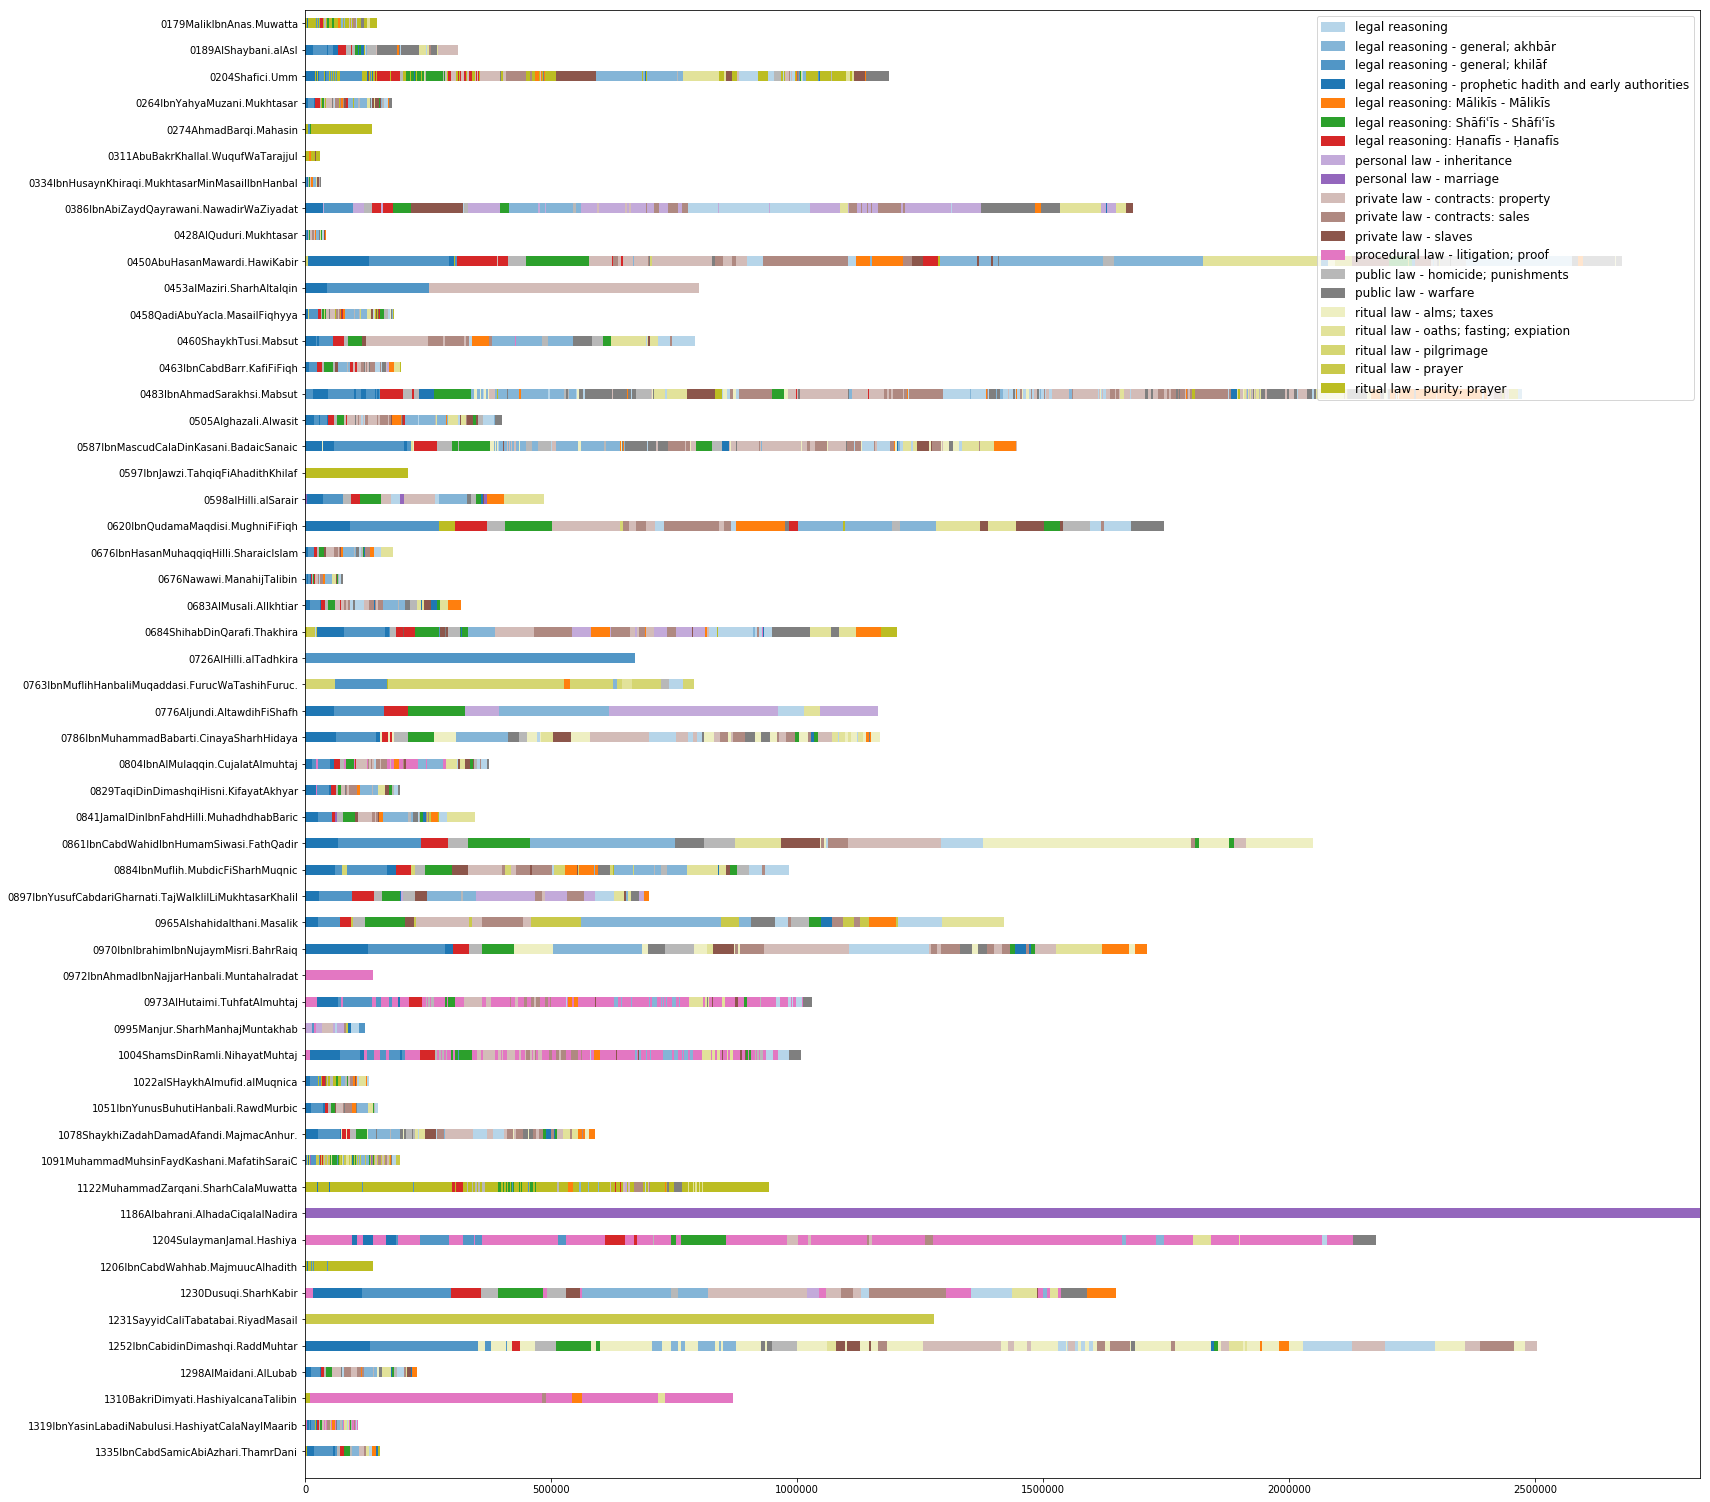

In [67]:
plot_bar_per_book(largest_topics, 'x0', 'x1', book_names, topic_names, legend=True)

Here we look at the distribution of topics per book, shown as percentages of the complete book.

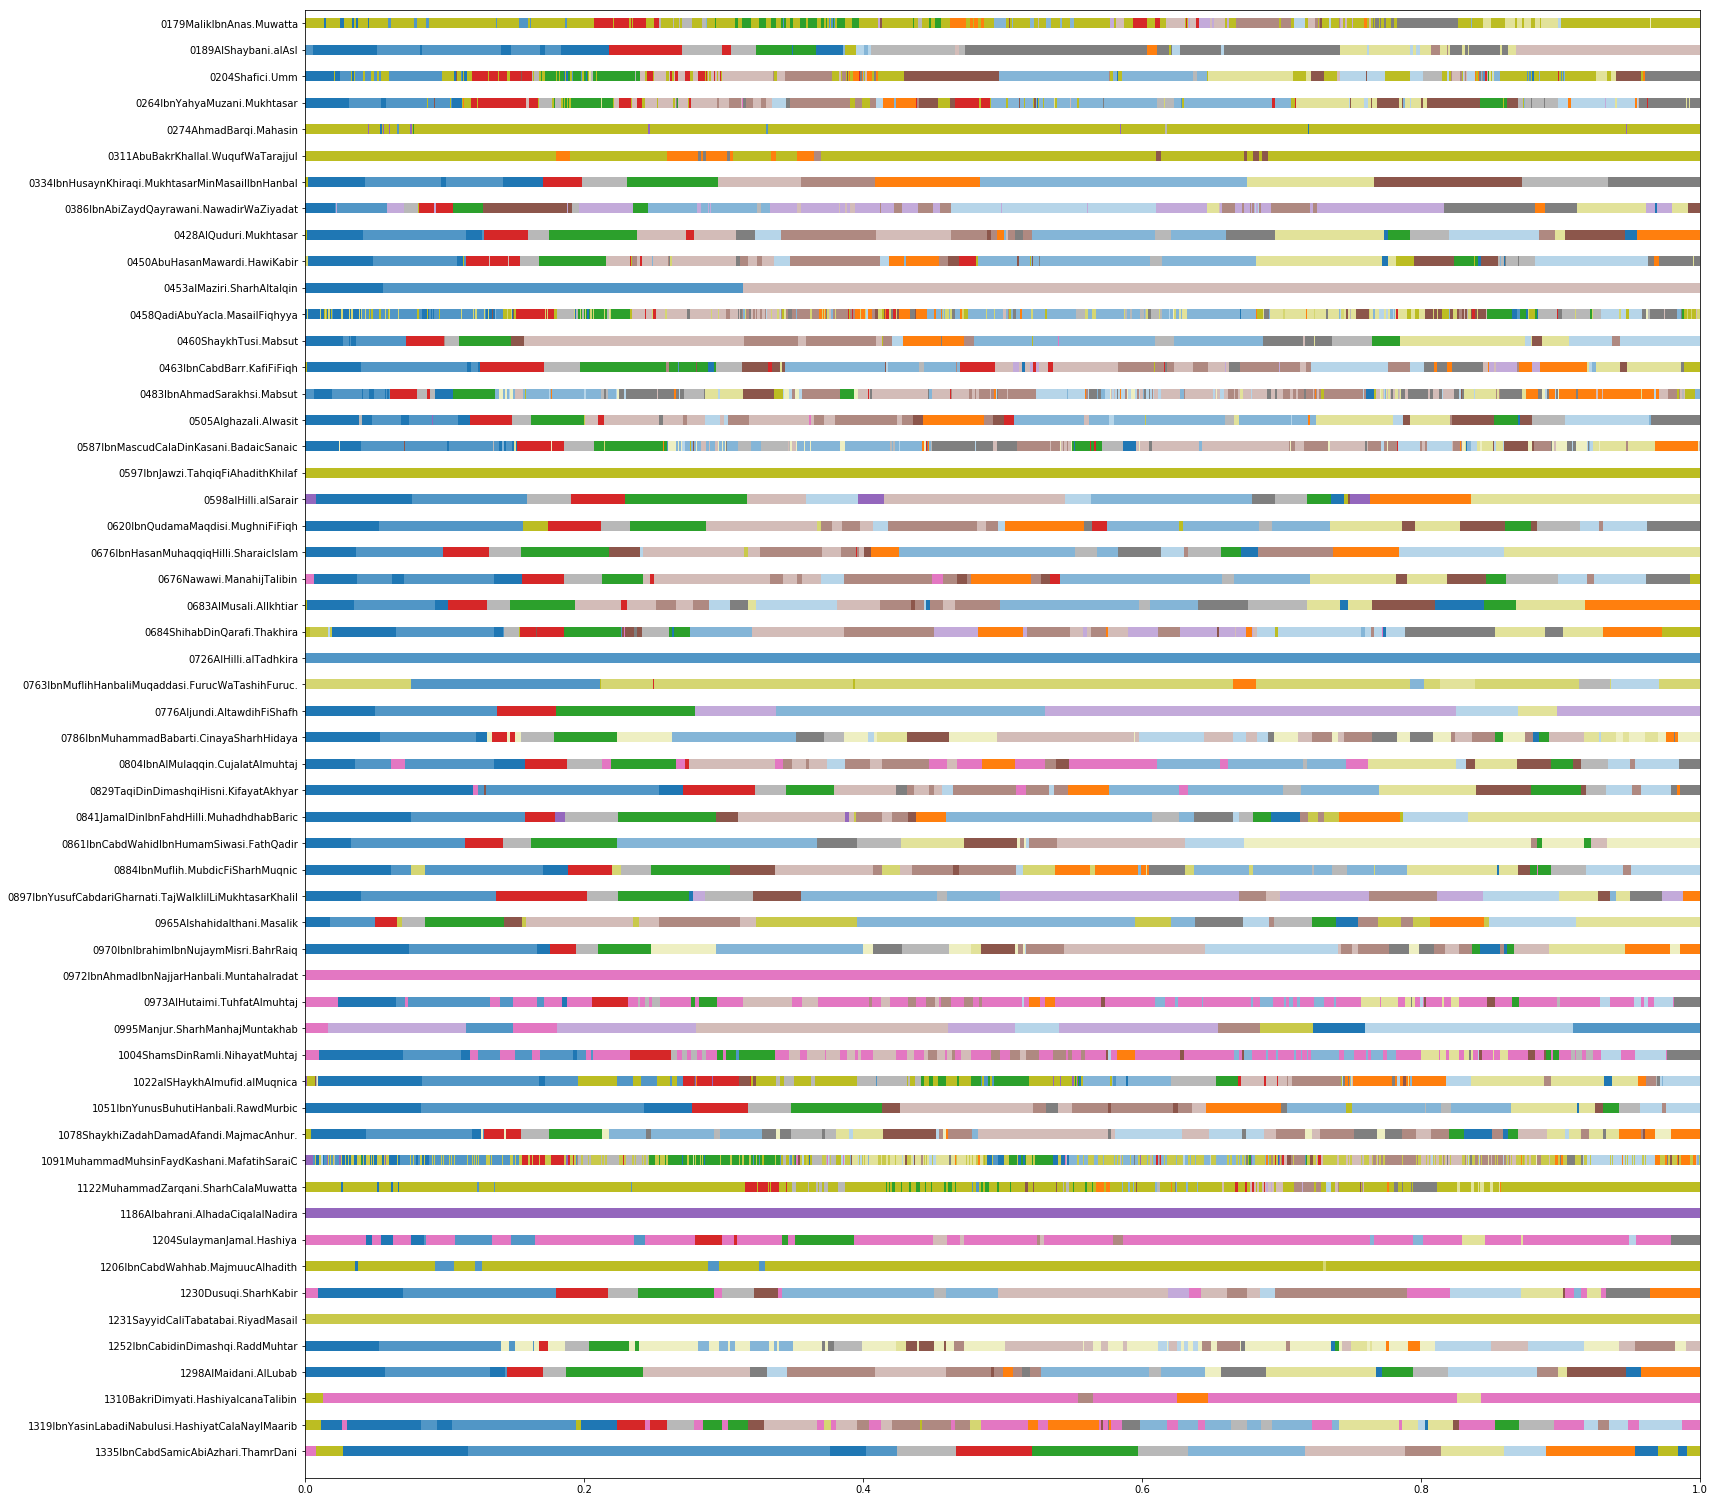

In [68]:
plot_bar_per_book(largest_topics, 'perc0', 'perc1', book_names, topic_names, legend=False)

Here is the same plot, but grouped per school.

مالكي


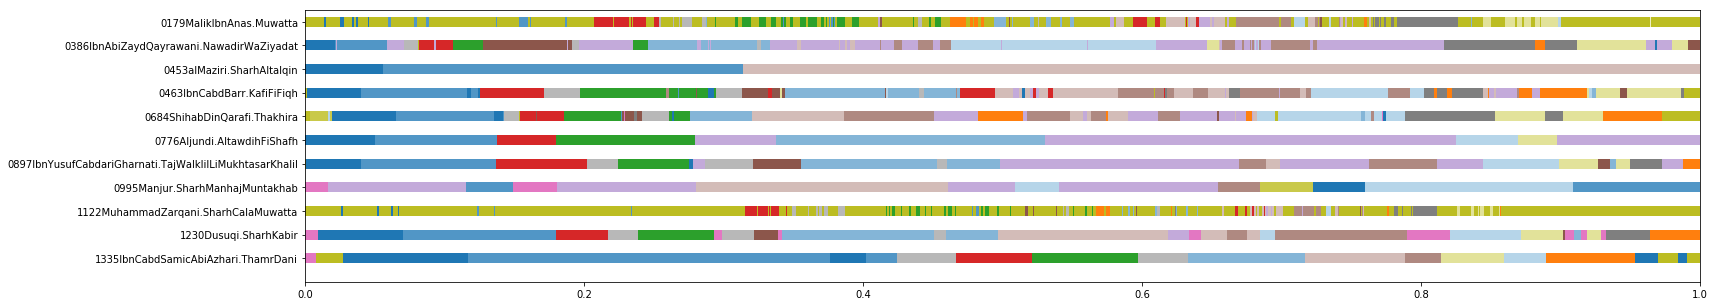

حنفي


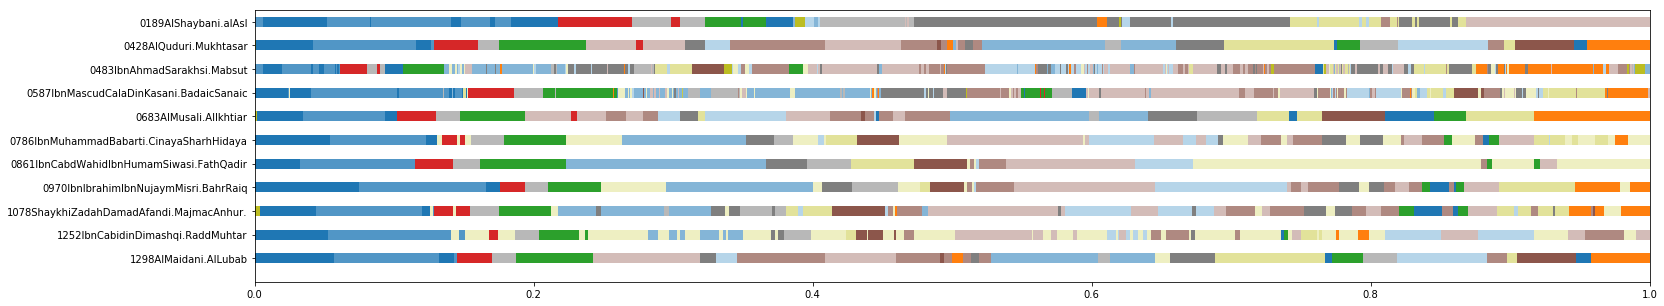

شافعي


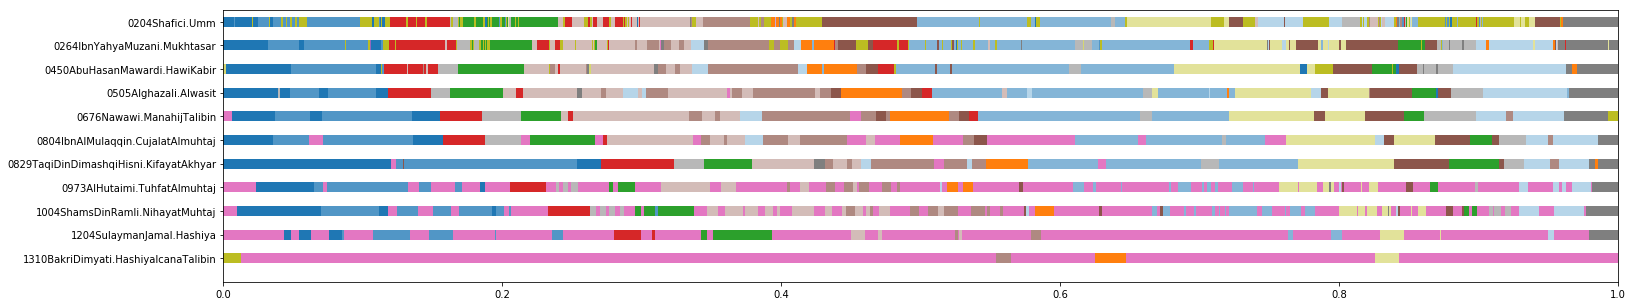

شيعي


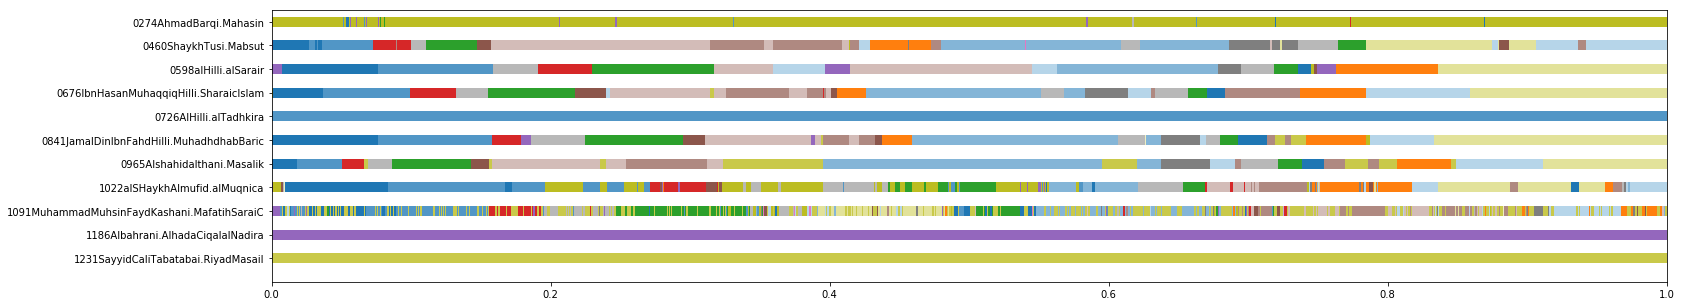

حنبلي


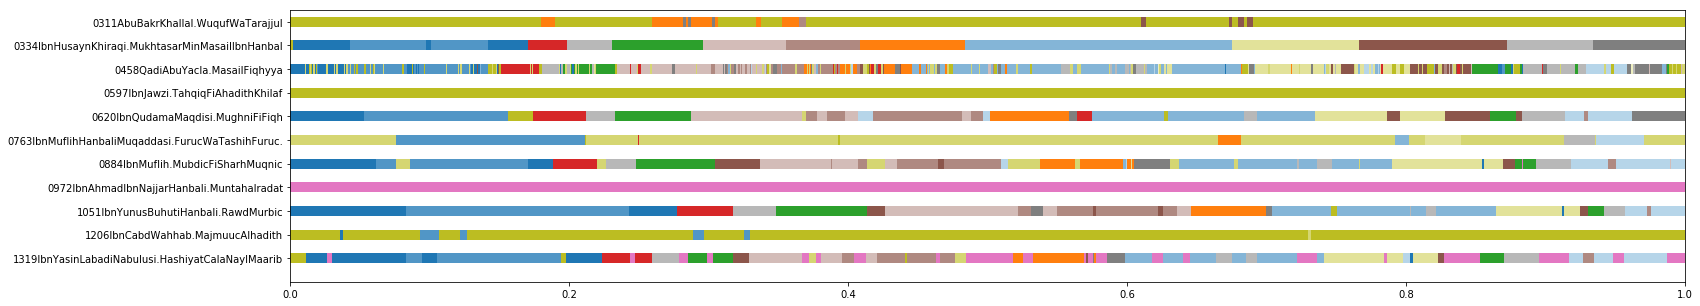

In [69]:
for subj in metadata.BookSUBJ.unique():
    if type(subj)==str:
        print(subj)
        ind_sub = metadata_newind[metadata_newind.BookSUBJ==subj].index.to_frame()
        ind_sub.columns = ['book', 'chapter']
        largest_topics_sub = largest_topics.merge(ind_sub, how='inner')
        plot_bar_per_book(largest_topics_sub, 'perc0', 'perc1', largest_topics_sub.book.unique(), topic_names, legend=False)

In [70]:
largest_topics['perc'] = largest_topics.perc1 - largest_topics.perc0

For each topic, what are the books that spent most time on that topic? (as percentage of the complete book). We also show the number of chapters with this topic in this book, because if the book consist of only 1 chapter, the book will have 100% one topic.

In [71]:
from IPython.display import display
for label in topic_names:
    print(label)
    grouped = largest_topics[largest_topics.label==label].groupby('book')
    #print(grouped['length'].aggregate((sum, len)).sort_values('sum', ascending=False)[:10])
    books_per_topic = grouped['perc'].aggregate((sum,len)).sort_values('sum', ascending=False)
    books_per_topic.columns = ['perc', 'nr_chapters']
    books_per_topic['perc'] = books_per_topic.perc.map(lambda x: '{:.1f}%'.format(x*100))
    books_per_topic['nr_chapters'] = books_per_topic.nr_chapters.map(int)
    display(books_per_topic[:10])
    print('\n')

public law - warfare


,perc,nr_chapters
book,,
0189AlShaybani.alAsl,29.1%,94
0483IbnAhmadSarakhsi.Mabsut,11.6%,115
0386IbnAbiZaydQayrawani.NawadirWaZiyadat,8.8%,8
0684ShihabDinQarafi.Thakhira,8.0%,9
0587IbnMascudCalaDinKasani.BadaicSanaic,7.0%,49
0334IbnHusaynKhiraqi.MukhtasarMinMasailIbnHanbal,6.6%,1
1078ShaykhiZadahDamadAfandi.MajmacAnhur.,5.9%,18
0786IbnMuhammadBabarti.CinayaSharhHidaya,5.8%,9
0428AlQuduri.Mukhtasar,5.5%,7




public law - homicide; punishments


,perc,nr_chapters
book,,
0189AlShaybani.alAsl,11.2%,24
0334IbnHusaynKhiraqi.MukhtasarMinMasailIbnHanbal,9.4%,3
1022alSHaykhAlmufid.alMuqnica,8.7%,26
1335IbnCabdSamicAbiAzhari.ThamrDani,7.8%,3
0458QadiAbuYacla.MasailFiqhyya,7.7%,62
0676Nawawi.ManahijTalibin,7.3%,5
0841JamalDinIbnFahdHilli.MuhadhdhabBaric,6.8%,6
0587IbnMascudCalaDinKasani.BadaicSanaic,6.8%,45
0683AlMusali.AlIkhtiar,6.7%,4




legal reasoning: Mālikīs - Mālikīs


,perc,nr_chapters
book,,
0483IbnAhmadSarakhsi.Mabsut,8.3%,65
0683AlMusali.AlIkhtiar,8.3%,2
0684ShihabDinQarafi.Thakhira,8.0%,35
0334IbnHusaynKhiraqi.MukhtasarMinMasailIbnHanbal,7.6%,7
0598alHilli.alSarair,7.3%,3
1022alSHaykhAlmufid.alMuqnica,6.8%,31
0676IbnHasanMuhaqqiqHilli.SharaicIslam,6.8%,2
0311AbuBakrKhallal.WuqufWaTarajjul,6.6%,11
0841JamalDinIbnFahdHilli.MuhadhdhabBaric,6.5%,2




ritual law - purity; prayer


,perc,nr_chapters
book,,
0597IbnJawzi.TahqiqFiAhadithKhilaf,100.0%,9
0274AhmadBarqi.Mahasin,98.5%,377
1206IbnCabdWahhab.MajmuucAlhadith,96.5%,98
0311AbuBakrKhallal.WuqufWaTarajjul,90.8%,66
1122MuhammadZarqani.SharhCalaMuwatta,81.7%,409
0179MalikIbnAnas.Muwatta,59.9%,431
0204Shafici.Umm,21.0%,247
1022alSHaykhAlmufid.alMuqnica,18.0%,80
0458QadiAbuYacla.MasailFiqhyya,5.9%,41




private law - contracts: sales


,perc,nr_chapters
book,,
0483IbnAhmadSarakhsi.Mabsut,13.8%,112
1298AlMaidani.AlLubab,13.0%,13
0684ShihabDinQarafi.Thakhira,12.4%,18
0428AlQuduri.Mukhtasar,12.1%,12
0676IbnHasanMuhaqqiqHilli.SharaicIslam,11.5%,14
0463IbnCabdBarr.KafiFiFiqh,11.4%,39
0460ShaykhTusi.Mabsut,10.9%,16
1230Dusuqi.SharhKabir,10.9%,10
1078ShaykhiZadahDamadAfandi.MajmacAnhur.,10.4%,18




ritual law - prayer


,perc,nr_chapters
book,,
1231SayyidCaliTabatabai.RiyadMasail,100.0%,23
1091MuhammadMuhsinFaydKashani.MafatihSaraiC,32.0%,408
0965Alshahidalthani.Masalik,14.0%,13
0995Manjur.SharhManhajMuntakhab,3.8%,1
0841JamalDinIbnFahdHilli.MuhadhdhabBaric,2.0%,3
0684ShihabDinQarafi.Thakhira,1.4%,18
0676IbnHasanMuhaqqiqHilli.SharaicIslam,0.3%,1
0897IbnYusufCabdariGharnati.TajWaIklilLiMukhtasarKhalil,0.0%,1
0505Alghazali.Alwasit,0.0%,2




personal law - marriage


,perc,nr_chapters
book,,
1186Albahrani.AlhadaCiqalalNadira,100.0%,1
0598alHilli.alSarair,4.0%,4
1091MuhammadMuhsinFaydKashani.MafatihSaraiC,1.2%,13
0841JamalDinIbnFahdHilli.MuhadhdhabBaric,1.0%,2
1022alSHaykhAlmufid.alMuqnica,0.7%,8
0274AhmadBarqi.Mahasin,0.6%,12
0460ShaykhTusi.Mabsut,0.1%,1
0505Alghazali.Alwasit,0.0%,3
1231SayyidCaliTabatabai.RiyadMasail,0.0%,1




ritual law - pilgrimage


,perc,nr_chapters
book,,
0763IbnMuflihHanbaliMuqaddasi.FurucWaTashihFuruc.,75.2%,23
0458QadiAbuYacla.MasailFiqhyya,8.2%,111
0884IbnMuflih.MubdicFiSharhMuqnic,6.6%,12
1319IbnYasinLabadiNabulusi.HashiyatCalaNaylMaarib,1.3%,2
0450AbuHasanMawardi.HawiKabir,0.4%,5
0620IbnQudamaMaqdisi.MughniFiFiqh,0.3%,1
1206IbnCabdWahhab.MajmuucAlhadith,0.2%,1
0264IbnYahyaMuzani.Mukhtasar,0.1%,1
0684ShihabDinQarafi.Thakhira,0.0%,1




procedural law - litigation; proof


,perc,nr_chapters
book,,
0972IbnAhmadIbnNajjarHanbali.MuntahaIradat,100.0%,1
1310BakriDimyati.HashiyaIcanaTalibin,93.8%,18
1204SulaymanJamal.Hashiya,77.6%,74
0973AlHutaimi.TuhfatAlmuhtaj,58.0%,158
1004ShamsDinRamli.NihayatMuhtaj,40.9%,127
1319IbnYasinLabadiNabulusi.HashiyatCalaNaylMaarib,19.0%,27
0804IbnAlMulaqqin.CujalatAlmuhtaj,16.5%,13
1230Dusuqi.SharhKabir,7.0%,13
0995Manjur.SharhManhajMuntakhab,4.8%,2




legal reasoning: Ḥanafīs - Ḥanafīs


,perc,nr_chapters
book,,
0264IbnYahyaMuzani.Mukhtasar,8.7%,39
0463IbnCabdBarr.KafiFiFiqh,8.1%,25
0897IbnYusufCabdariGharnati.TajWaIklilLiMukhtasarKhalil,6.5%,1
0204Shafici.Umm,6.1%,115
0189AlShaybani.alAsl,5.9%,8
1335IbnCabdSamicAbiAzhari.ThamrDani,5.4%,3
0179MalikIbnAnas.Muwatta,5.3%,25
0829TaqiDinDimashqiHisni.KifayatAkhyar,5.2%,5
0450AbuHasanMawardi.HawiKabir,5.0%,28




ritual law - alms; taxes


,perc,nr_chapters
book,,
1252IbnCabidinDimashqi.RaddMuhtar,38.0%,90
0861IbnCabdWahidIbnHumamSiwasi.FathQadir,30.6%,27
0786IbnMuhammadBabarti.CinayaSharhHidaya,20.3%,28
0970IbnIbrahimIbnNujaymMisri.BahrRaiq,8.7%,8
0587IbnMascudCalaDinKasani.BadaicSanaic,5.0%,66
1078ShaykhiZadahDamadAfandi.MajmacAnhur.,3.6%,8
0483IbnAhmadSarakhsi.Mabsut,2.7%,22
1298AlMaidani.AlLubab,1.1%,1
0458QadiAbuYacla.MasailFiqhyya,0.2%,2




legal reasoning


,perc,nr_chapters
book,,
0995Manjur.SharhManhajMuntakhab,18.1%,3
0386IbnAbiZaydQayrawani.NawadirWaZiyadat,14.7%,12
0460ShaykhTusi.Mabsut,10.0%,12
0450AbuHasanMawardi.HawiKabir,9.9%,8
1252IbnCabidinDimashqi.RaddMuhtar,9.7%,17
0684ShihabDinQarafi.Thakhira,9.7%,41
0970IbnIbrahimIbnNujaymMisri.BahrRaiq,9.6%,5
0676IbnHasanMuhaqqiqHilli.SharaicIslam,9.4%,4
1078ShaykhiZadahDamadAfandi.MajmacAnhur.,9.3%,15




legal reasoning: Shāfiʿīs - Shāfiʿīs


,perc,nr_chapters
book,,
0598alHilli.alSarair,10.5%,2
0776Aljundi.AltawdihFiShafh,9.9%,1
1091MuhammadMuhsinFaydKashani.MafatihSaraiC,9.6%,121
0463IbnCabdBarr.KafiFiFiqh,9.0%,32
0841JamalDinIbnFahdHilli.MuhadhdhabBaric,8.3%,2
0428AlQuduri.Mukhtasar,7.9%,9
1298AlMaidani.AlLubab,7.7%,9
1051IbnYunusBuhutiHanbali.RawdMurbic,7.7%,14
0676IbnHasanMuhaqqiqHilli.SharaicIslam,7.7%,3




legal reasoning - general; akhbār


,perc,nr_chapters
book,,
0965Alshahidalthani.Masalik,21.7%,6
0505Alghazali.Alwasit,19.9%,43
0776Aljundi.AltawdihFiShafh,19.3%,2
0460ShaykhTusi.Mabsut,19.3%,37
0334IbnHusaynKhiraqi.MukhtasarMinMasailIbnHanbal,19.1%,9
0450AbuHasanMawardi.HawiKabir,19.0%,43
0264IbnYahyaMuzani.Mukhtasar,18.8%,86
0458QadiAbuYacla.MasailFiqhyya,18.3%,132
0829TaqiDinDimashqiHisni.KifayatAkhyar,17.4%,20




legal reasoning - general; khilāf


,perc,nr_chapters
book,,
0726AlHilli.alTadhkira,100.0%,1
1335IbnCabdSamicAbiAzhari.ThamrDani,28.2%,6
0453alMaziri.SharhAltalqin,25.8%,9
1051IbnYunusBuhutiHanbali.RawdMurbic,16.0%,12
1022alSHaykhAlmufid.alMuqnica,14.5%,32
0763IbnMuflihHanbaliMuqaddasi.FurucWaTashihFuruc.,13.5%,1
0829TaqiDinDimashqiHisni.KifayatAkhyar,12.9%,19
0189AlShaybani.alAsl,12.6%,30
0995Manjur.SharhManhajMuntakhab,12.5%,2




private law - contracts: property


,perc,nr_chapters
book,,
0453alMaziri.SharhAltalqin,68.6%,1
0483IbnAhmadSarakhsi.Mabsut,19.4%,149
0786IbnMuhammadBabarti.CinayaSharhHidaya,18.1%,27
0995Manjur.SharhManhajMuntakhab,18.0%,2
0598alHilli.alSarair,17.2%,2
0460ShaykhTusi.Mabsut,17.0%,5
1078ShaykhiZadahDamadAfandi.MajmacAnhur.,16.1%,24
0587IbnMascudCalaDinKasani.BadaicSanaic,16.1%,89
1230Dusuqi.SharhKabir,15.1%,7




legal reasoning - prophetic hadith and early authorities


,perc,nr_chapters
book,,
1335IbnCabdSamicAbiAzhari.ThamrDani,13.8%,11
0829TaqiDinDimashqiHisni.KifayatAkhyar,13.7%,13
1051IbnYunusBuhutiHanbali.RawdMurbic,11.9%,13
0189AlShaybani.alAsl,11.2%,24
1319IbnYasinLabadiNabulusi.HashiyatCalaNaylMaarib,10.6%,13
0970IbnIbrahimIbnNujaymMisri.BahrRaiq,10.0%,4
0841JamalDinIbnFahdHilli.MuhadhdhabBaric,9.7%,2
1022alSHaykhAlmufid.alMuqnica,8.7%,17
0683AlMusali.AlIkhtiar,8.6%,11




personal law - inheritance


,perc,nr_chapters
book,,
0776Aljundi.AltawdihFiShafh,45.5%,4
0995Manjur.SharhManhajMuntakhab,36.1%,7
0386IbnAbiZaydQayrawani.NawadirWaZiyadat,32.4%,91
0897IbnYusufCabdariGharnati.TajWaIklilLiMukhtasarKhalil,29.1%,19
0684ShihabDinQarafi.Thakhira,10.5%,11
0463IbnCabdBarr.KafiFiFiqh,3.3%,10
0179MalikIbnAnas.Muwatta,1.9%,12
1230Dusuqi.SharhKabir,1.5%,1
1122MuhammadZarqani.SharhCalaMuwatta,0.3%,5




ritual law - oaths; fasting; expiation


,perc,nr_chapters
book,,
0841JamalDinIbnFahdHilli.MuhadhdhabBaric,16.7%,3
0598alHilli.alSarair,16.4%,2
0676IbnHasanMuhaqqiqHilli.SharaicIslam,14.1%,3
0460ShaykhTusi.Mabsut,11.1%,17
1022alSHaykhAlmufid.alMuqnica,11.0%,25
0683AlMusali.AlIkhtiar,9.6%,8
0450AbuHasanMawardi.HawiKabir,9.6%,10
0804IbnAlMulaqqin.CujalatAlmuhtaj,9.3%,10
0334IbnHusaynKhiraqi.MukhtasarMinMasailIbnHanbal,9.1%,5




private law - slaves


,perc,nr_chapters
book,,
0334IbnHusaynKhiraqi.MukhtasarMinMasailIbnHanbal,10.6%,1
0204Shafici.Umm,9.8%,19
0264IbnYahyaMuzani.Mukhtasar,8.5%,36
0386IbnAbiZaydQayrawani.NawadirWaZiyadat,7.2%,10
0505Alghazali.Alwasit,5.8%,13
0450AbuHasanMawardi.HawiKabir,5.2%,10
0676Nawawi.ManahijTalibin,5.0%,7
0683AlMusali.AlIkhtiar,4.8%,2
0804IbnAlMulaqqin.CujalatAlmuhtaj,4.7%,7


## Barplots

In [87]:
def plot_bars_values(values, topic_names, reshape_col1=False):
    plt.figure(figsize=(15,10))
    ax = plt.gca()
    values = values.unstack().fillna(0)
    values = values.reindex(sorted(values.index), axis=0)
    #sorted_index = values.sum(axis=1).sort_values(ascending=False).index
    #values = values.loc[sorted_index,:]
    ind0 = values.index
    ind1 = values.columns
    x = np.arange(len(ind0))
    last_y = np.repeat(0, len(ind0))
    for t, topic_name in enumerate(ind1):
        y = values[topic_name]
        if topic_name != 'noise':
            ax.bar(x, y, bottom=last_y, color=color_dict[topic_name],
                    label=bidi.algorithm.get_display(arabic_reshaper.reshape(topic_name)))
            last_y = last_y+y
    if reshape_col1:
        xlabels = [bidi.algorithm.get_display(arabic_reshaper.reshape(l)) for l in ind0]
    else:
        xlabels = ind0
    ax.set_xticks(x)
    ax.set_xticklabels(xlabels, rotation=90)
    handles, labels = ax.get_legend_handles_labels()
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

def plot_bars_per_topic(df, topic_names, col1, col2='ChapterLength', aggfunc=sum, reshape_col1=False):
    values = df.groupby([col1, 'topic_name'])[col2].apply(aggfunc).sort_values()
    plot_bars_values(values, topic_names, reshape_col1=False)

Here we see the total number of tokens in the corpus per topic, grouped by school.

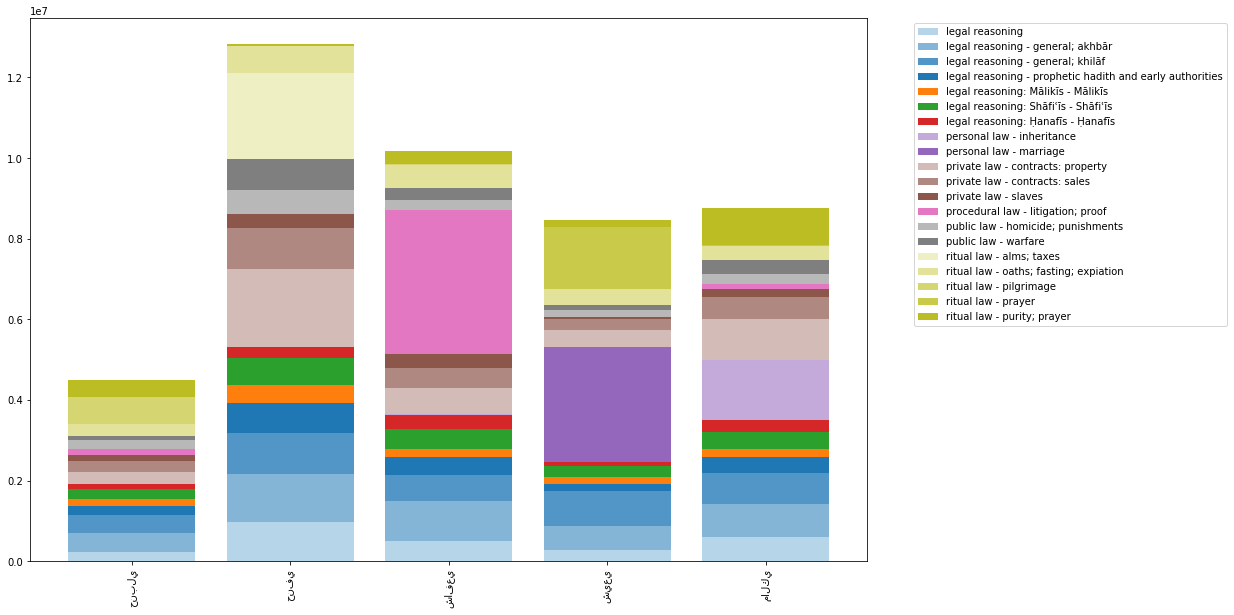

In [88]:
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ', reshape_col1=True)

Now normalized by total number tokens per school:

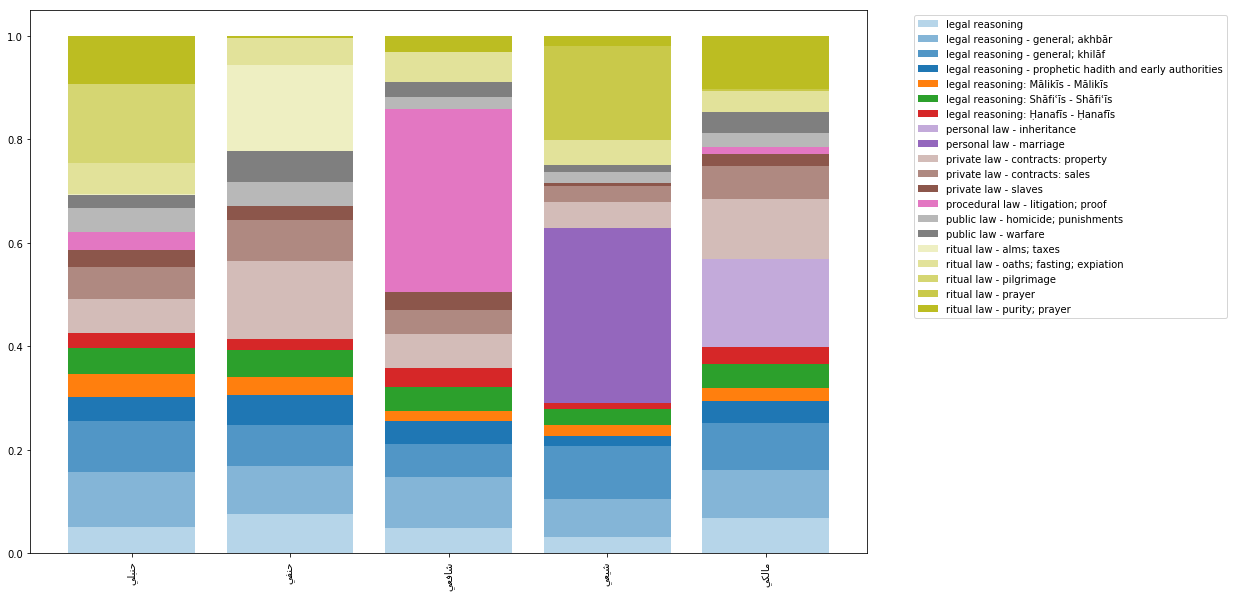

In [90]:
col1= 'BookSUBJ'
col2 = 'ChapterLength'
df = metadata_newind
nr_tokens_per_school = df.groupby([col1])[col2].sum()
rel_topic_per_school = df.groupby([col1, 'topic_name'])[col2].sum().sort_values() / nr_tokens_per_school
plot_bars_values(rel_topic_per_school, topic_names, reshape_col1=True)

This is only the number the chapters (so not normalized by chapter length).

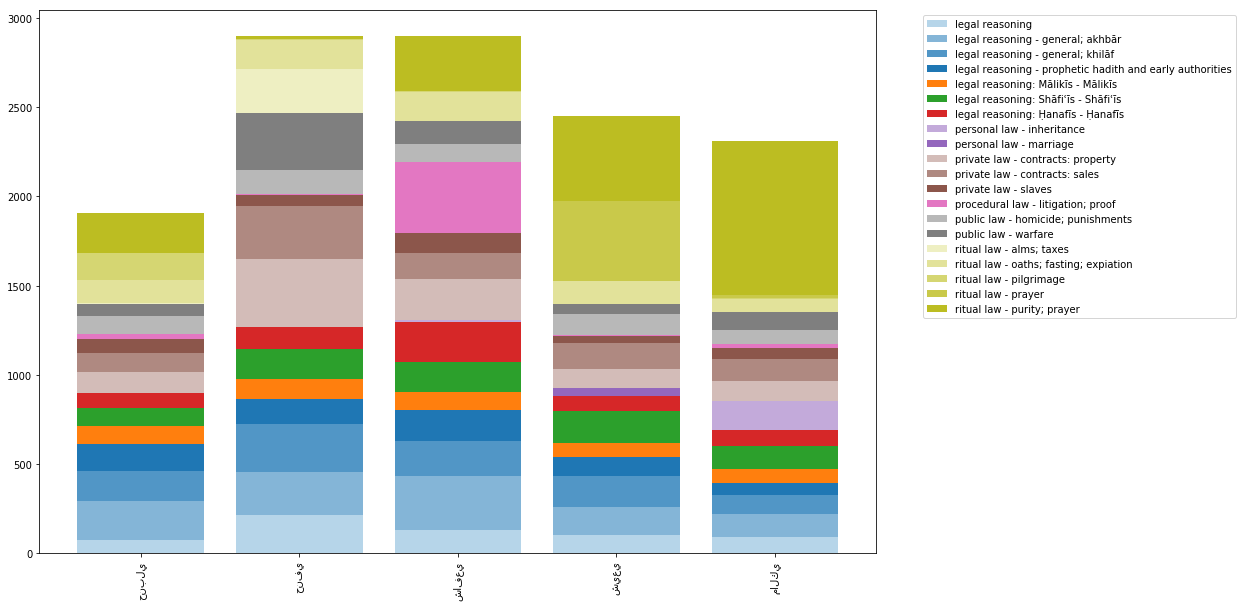

In [74]:
# Here we see only the number of chapters
plot_bars_per_topic(metadata_newind, topic_names, 'BookSUBJ', aggfunc=len)

This is the number of tokens per topic, per geographica area

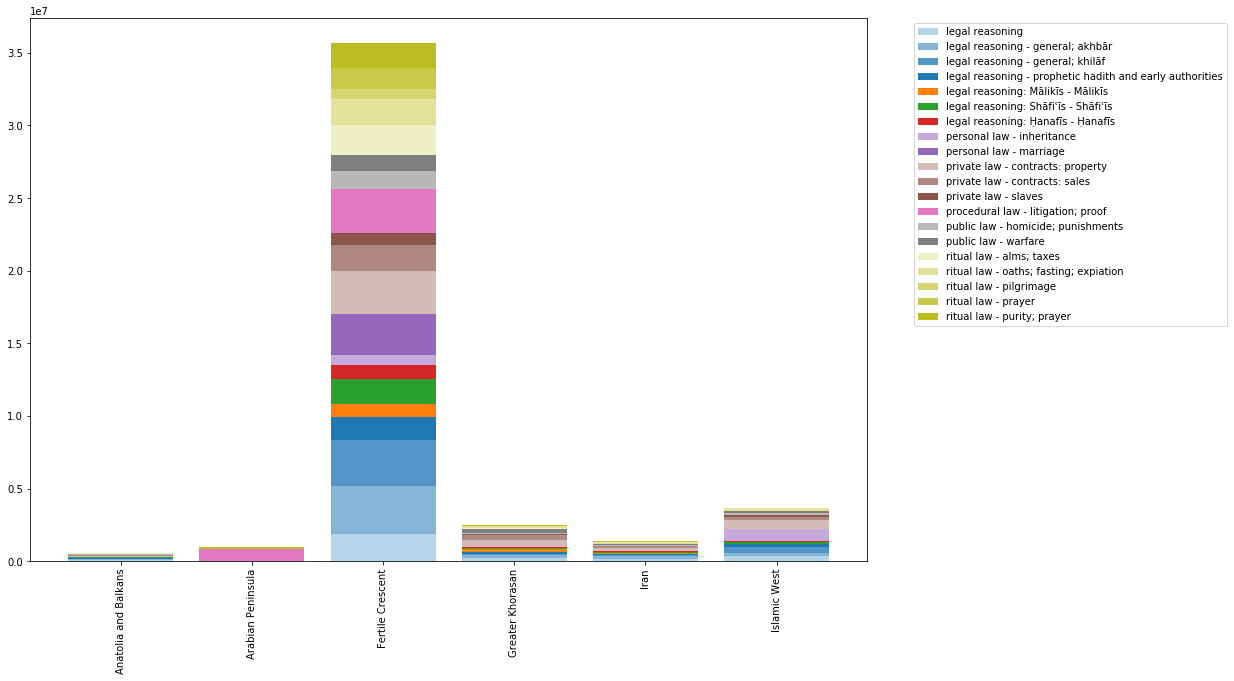

In [75]:
plot_bars_per_topic(metadata_newind, topic_names, 'Author_Geographical_Area')

In [98]:
import re
metadata_newind['Century_num'] = metadata_newind.Century.apply(lambda s: int(re.match('^[0-9]*', s).group(0)))

And the number of tokens per topic, per century

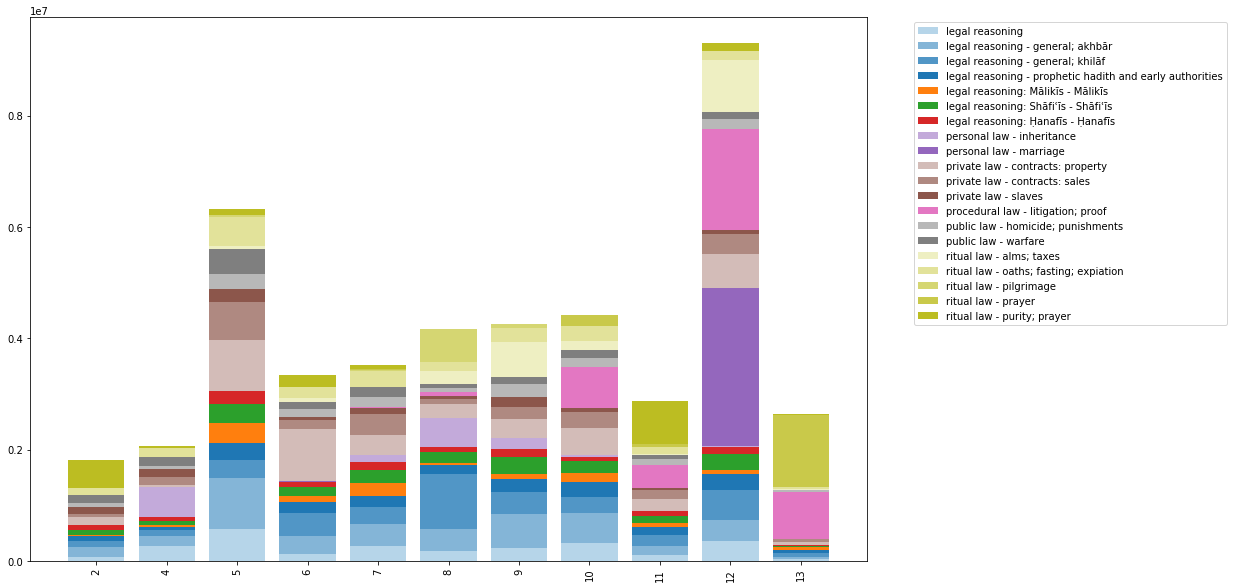

In [99]:
plot_bars_per_topic(metadata_newind, topic_names, 'Century_num')

Now normalized by the total number of tokens per century:

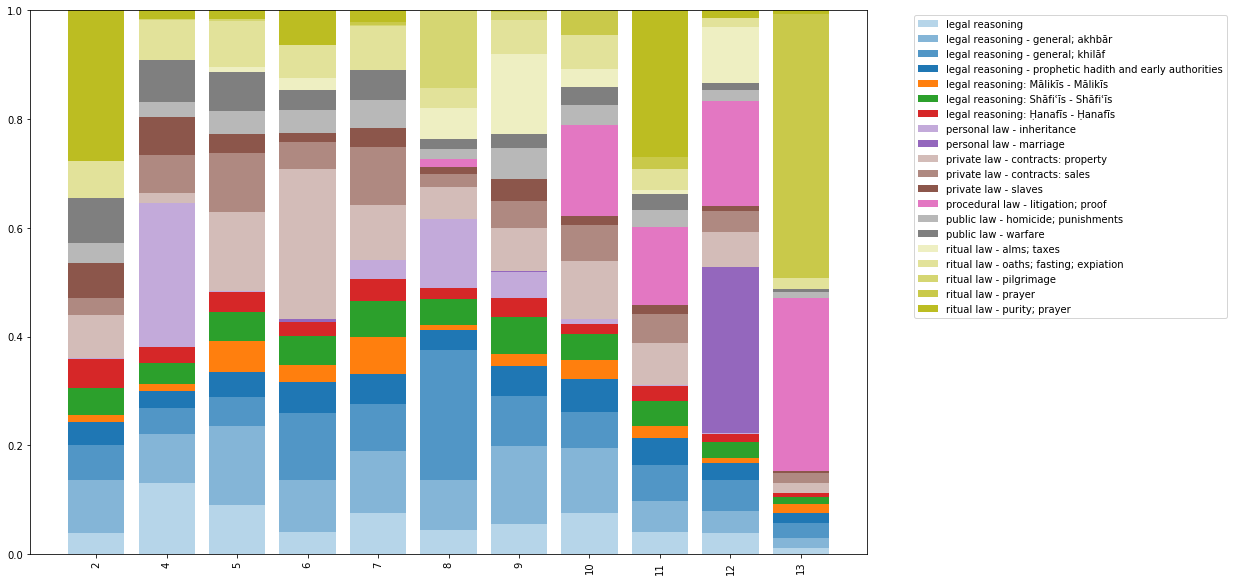

In [100]:
col1= 'Century_num'
col2 = 'ChapterLength'
df = metadata_newind
nr_tokens_per_century = df.groupby([col1])[col2].sum()
rel_topic_per_century = df.groupby([col1, 'topic_name'])[col2].sum().sort_values() / nr_tokens_per_century
plot_bars_values(rel_topic_per_century, topic_names, reshape_col1=False)

## Volume and chapter titles

In [101]:
def style_color(df, color):
    st = 'background-color: {}'.format(color)
    return df.style.apply(lambda r: [st]*len(r))

# Print the most common titles per topic
for t, topic_name in enumerate(topic_names):
    #if topic_name != 'noise':
    meta_sub = metadata_newind[metadata_newind['topic_name']==topic_name]
    color = matplotlib.colors.to_hex(color_dict[topic_name])
    #print(t, topic_name)
    display(style_color(pd.DataFrame([topic_name], index=[t], columns=['label']), color=color))
    print("Volumes:")
    for v in meta_sub.Level1Title.value_counts().head(10).index:
        print(v)
    print("\nChapters:")
    for c in meta_sub.Level2Title.value_counts().head(10).index:
        print(c)
    print('\n')

,label
0,public law - warfare


Volumes:
-
كتاب المكاتب
كتاب العتق
كتاب باب إغماض الميت
كتاب العتاق
كتاب المأذون الكبير
كتاب الولاء
كتاب الأقضية واليمين مع الشاهد وما دخل فيه من اختلاف الحديث وغير
كتاب العتق والمدبر والمكاتب وأم الولد
كتاب المأذون

Chapters:
-
باب الاستيلاد
باب التدبير
باب من يعتق على الرجل والمرأة إذا علما
باب
بابفيه ذكر شراء كسور السؤال وفى الزبل يجتمع فى أرض حبس هل يعمل به طوب من
مسألة
باب جامع العتق واذا قال الرجل لعبده أنت حر او
الباب السادس في الرجوع عن الشهادة
الباب الثامن والعشرون في الحلى




,label
1,public law - homicide; punishments


Volumes:
-
كتاب الأيمان
كتاب الصيام
كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت
كتاب الصوم
كتاب الأيمان والنذور والكفارات
كتاب باب إغماض الميت
كتاب النكاح وفيما يتعلق به من المهر والخلع والطلاق والرجعة والإيلاء والظهار والرضاع والعدة
كتاب الزكاة مسائل في حكم مانع الزكاة من امتنع عن إخراج الزكاة بخلا وقاتل عليها مسألة واختلفت
كتاب مفاتيح النذور العهود

Chapters:
-
باب الاعتكاف
باب صوم التطوع
باب صدقة الفطر
باب الظهار
باب
مسألة
باب من تلزمه الزكاة وما تجب فيه مراده بما تجب فيه شروطه وإلا فقد بين ما تجب فيه الزكاة فيما مضى شروط وجوب زكاة المال أي السالف ذكره وهو الحيوان والنبات وجوهر النقدين والتجارة والمعدن والركاز الإسلام أى فلا تجب على كافر أصلي بمعنى أنه لا يطالب بها في حال كفره ولا بعد إسلامه نعم يعاقب عليها في الأخرى والحرية أي فلا زكاة على قن لعدم ملكه وتلزم المرتد أي إذا مضي عليه حول في الردة بعد ملك النصاب إن أبقينا ملكه ومؤاخذة له بحكم الإسلام فإن قلنا أن ملكه زال فلا أو موقوف فموقوفة وهو الأصح أما إذا وجبت الزكاة ثم ارتد أخذت من ماله على المشهو

,label
2,legal reasoning: Mālikīs - Mālikīs


Volumes:
كتاب الفرائض
كتاب الوصايا
-
كتاب الفرائض والمواريث
كتاب باب إغماض الميت
كتاب الفرائض والمواريث روي عن النبي صلى الله عليه وآله أنه قال
كتاب مفاتيح الفرائض المواريث
كتاب الوكالة
كتاب العتق
كتاب العين والدين

Chapters:
-
باب ذوي الأرحام
باب
باب ميراث
باب ميراث الخنثى
باب الموصى إليه
باب السلم
باب الأوصياء
باب ميراث الجد
باب الموصى له




,label
3,ritual law - purity; prayer


Volumes:
-
كتاب
كتاب العتق
كتاب الحج باب
كتاب الحج باب الغسل للإهلال
كتاب باب إغماض الميت
كتاب الحج باب فرض الحج على من وجب عليه الحج
كتاب وقوت الصلاة
كتاب الزكاة
كتاب القاضي إلى القاضي

Chapters:
باب
-
باب ما جاء في
باب ما
باب السبق باب السبق وللبخاري عن ابن عمر قال أجرى النبي صلى الله عليه وسلم
باب القرض باب القرض وعن عبد الله بن أبي ربيعة أن النبي صلى الله عليه وسلم
ثواب
باب ما جاء
باب فضل زيارته
باب مختصر زيارته




,label
4,private law - contracts: sales


Volumes:
كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
كتاب المزارعة
كتاب المضاربة
كتاب الإجارة
كتاب الغصب
كتاب القسمة
كتاب العارية
كتاب الشركة
كتاب الإجارات
كتاب باب إغماض الميت

Chapters:
-
باب الرجوع عن الشهادة
باب السلم
باب الصرف
باب الضمان شرط الضامن الرشد
باب اللقطة
مهمة فرع لو قال رجل غصبنا من فلان ألف درهم وكنا عشرة قال محمد بن الحسن لا يصدق ويلزمه الكل وقال زفر يقبل قوله مع يمينه قال في البيان
باب المضارب يضارب
باب الشفعة
بابفي إحياء الموات من الأرض وشيء من ذكر القطائع من المجموعة وكتاب ابن حبيب روى ابن وهب




,label
5,ritual law - prayer


Volumes:
كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
كتاب مفاتيح الصلاة
كتاب مفاتيح المناكح المواليد
كتاب مفاتيح الحسبة الحدود
كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت
كتاب مفاتيح الحج
كتاب مفاتيح العطايا المروات
-
كتاب مفاتيح الزكاة
كتاب مفاتيح القضاء الشهادات

Chapters:
-
مفتاح ما يشترط فيها حكم الرجوع
مفتاح حكم إقراض مال الطفل
مفتاح الحد حق لمن نسب اليه الزنا
مفتاح دية اللسان
مفتاح ما يستحب أن يعمل بالمحتضر
مفتاح ثبوته بالبينة الإقرار
مفتاح ما يشترط في الصداق
مفتاح كفارات الصيد
مفتاح طريق ثبوت شهر رمضان




,label
6,personal law - marriage


Volumes:
-
كتاب مفاتيح الصلاة
كتاب مفاتيح المناكح المواليد
كتاب مفاتيح الزكاة
كتاب مفاتيح المطاعم المشارب
كتاب مفاتيح الصلاة فلا نعيده في الصحيح هما واحد إذا قصرت أفطرت إذا أفطرت قصرت
كتاب التيمم وفيه ثلاثة أبواب
كتاب المكاسب
كتاب الخمس
كتاب الطهارة

Chapters:
-
باب كذا في جميع ما عندي من نسخ المحاسن عنه عن صالح بن السندي عن
مفتاح الطيب حلال الخبيث حرام
مفتاح ما يدخل في الأرباح
باب ما يلزم الميت
باب الشيعة عنه عن الحسن بن محبوب عن
مفتاح استحباب ثقب أذن المولود
باب فضل زيارة علي بن الحسين محمد بن علي جعفر بن محمد
الباب الثاني في الجمع
مفتاح حكم بيع المصاحف شرائها




,label
7,ritual law - pilgrimage


Volumes:
كتاب الطهارة مسائل في أحكام المياه الوضوء بالماء المتغير
كتاب النكاح وفيما يتعلق به من المهر والخلع والطلاق والرجعة والإيلاء والظهار والرضاع والعدة
كتاب السير
كتاب الحج من أحرم بالحج عن غيره وهو لم يحج عن نفسه مسألة اختلف أصحابنا رحمة الله عليهم
كتاب الزكاة مسائل في حكم مانع الزكاة من امتنع عن إخراج الزكاة بخلا وقاتل عليها مسألة واختلفت
كتاب الوديعة وقسم الفيء والغنيمة
كتاب البيوع وما يتعلق به من العقود بيع من غير رؤية المبيع ولا وصفه مسألة واختلفت الرواية عن
كتاب العتق والمدبر والمكاتب وأم الولد
-
كتاب الجنائز مسائل في عيادة المريض عيادة أهل الذمة مسألة واختلفت هل يكره للمسلم عيادة اليهودي

Chapters:
-
مسألة
مسألة اختلفت في أكثر الحيض فنقل الجماعة منهم أبو داود
مسألة واختلفت إذا أتى المسجد فرأى بين يديه
مسألة واختلفت هل يجوز للمحدث أن يتصفح ورق المصحف بكمه فنقل الحسن بن
مسألة هل يجوز أن يتألف المشركون في وقتنا هذا
مسألة في الصبي إذا كان يعقل ويميز
باب بيع ما يجوز بيعه وما لا يجوز
مسألة واختلفت أيضا في الصلاة فنقل أبو عبد الله بن بطة عن يعقوب بن
باب النظر في الصلاة إلى ما يشغل

,label
8,procedural law - litigation; proof


Volumes:
كتاب النكاح
كتاب الصلاة
-
كتاب
كتاب الحج
كتاب الطلاق هو لغة حل القيد وشرعا حل قيد النكاح باللفظ الآتي والأصل فيه الكتاب والسنة وإجماع
كتاب الوصايا
كتاب الفرائض أي مسائل قسمة المواريث جمع فريضة بمعنى مفروضة
كتاب الرهن
كتاب الصلاة هي شرعا

Chapters:
-
فصل في
بابا عن غير مميز كطير وعبد مجنون وهذا أعم وأولى من قوله ولو فتح قفصا
مهمة فرع لو قال رجل غصبنا من فلان ألف درهم وكنا عشرة قال محمد بن الحسن لا يصدق ويلزمه الكل وقال زفر يقبل قوله مع يمينه قال في البيان
باب دعوى الدم
فصلفي شروط الإمام الأعظم وبيان طرق الإمامة
فصل في شروط الإمام الأعظم وبيان طرق الإمامة هي فرض كفاية كالقضاء فيأتي فيها أقسامه
فصل في بيان النظر على الوقف وشروطه ووظيفة الناظر
فصل في العقيقة وهي لغة شعر رأس المولود حين ولادته وشرعا
باب قاطع الطريق الأصل فيه آية إنما جزاء الذين يحاربون الله ورسوله




,label
9,legal reasoning: Ḥanafīs - Ḥanafīs


Volumes:
كتاب الزكاة
-
كتاب باب إغماض الميت
كتاب البيوع
كتاب مفاتيح الزكاة
كتاب الزكاة مسائل في حكم مانع الزكاة من امتنع عن إخراج الزكاة بخلا وقاتل عليها مسألة واختلفت
كتاب الجمعة وغيرها من أمرها
كتاب قسم الصدقات
كتاب الزكاة فصل في حقيقة الزكاة وما يحب فيها وبيان شروطها
الزكاة

Chapters:
-
باب زكاة الفطر
باب زكاة العروض
باب زكاة الذهب
باب صدقة الفطر
باب
باب صدقة الخلطاء
باب مكيلة زكاة الفطر
باب إخراج الزكاة
باب الربا




,label
10,ritual law - alms; taxes


Volumes:
كتاب النكاح
-
كتاب الطلاق
كتاب الحدود
كتاب الإقرار
كتاب الوصايا
كتاب الزكاة
كتاب الإكراه
كتاب الأيمان
كتاب الدعوى

Chapters:
-
باب البغاة
باب موت المكاتب وعجزه وموت المولى
باب ما يبطلها
فصل وأما شرائط الركن فأنواع
باب الاستبراء وغيره
باب القسامة
باب الوصي
الوصي وما يملكه قال ومن
باب المضارب يضارب




,label
11,legal reasoning


Volumes:
كتاب الشهادات
كتاب الدعوى
كتاب مفاتيح القضاء الشهادات
كتاب باب إغماض الميت
كتاب القضاء
-
كتاب القاضي إلى القاضي
كتاب الإقرار
كتاب الأقضية
كتاب

Chapters:
-
باب حد القذف
باب الرجوع عن الشهادة
باب الصرف
باب كتاب القاضي إلى القاضي
باب
باب الشهادة على الشهادة
فصل وأما بيان حكم الشهادة
باب الدعاوي والبينات
باب دعوى النسب




,label
12,legal reasoning: Shāfiʿīs - Shāfiʿīs


Volumes:
كتاب الحج
كتاب مفاتيح الحج
-
كتاب المناسك
كتاب الحج باب فرض الحج على من وجب عليه الحج
كتاب الحج باب الغسل للإهلال
كتاب الحج من أحرم بالحج عن غيره وهو لم يحج عن نفسه مسألة اختلف أصحابنا رحمة الله عليهم
كتاب مفاتيح المطاعم المشارب
كتاب باب إغماض الميت
كتاب الحج باب

Chapters:
-
باب الإحصار
باب
باب الاعتكاف
باب الهدي
باب المواقيت
الباب الثاني في الاضطرار
مسألة
باب القران
باب الذكاة




,label
13,legal reasoning - general; akhbār


Volumes:
كتاب الطلاق
كتاب النكاح وفيما يتعلق به من المهر والخلع والطلاق والرجعة والإيلاء والظهار والرضاع والعدة
كتاب النكاح
كتاب باب إغماض الميت
كتاب مفاتيح المناكح المواليد
-
كتاب الوكالة
كتاب النفقات
كتاب الرضاع
كتاب النكاح باب السنة في عقد

Chapters:
-
باب الرجعة
باب الخيار والاعفاف ونكاح العبد وجد أحد زوجين
باب الخيار والإعفاف ونكاح العبد وجد أحد زوجين بالآخر جنونا أي مطبقا أو متقطعا أو جذاما أو برصا أي مستحكمين أو وجدها رتقاء أي وهو انسداد محل الجماع باللحم أو قرناء أي وهو عظم في الفرج يمنع الجماع ويقال لحم ينبت فيه أو وجدته عنينا أي وهو الرجل العاجز عن الوطء أو محبوبا أي وهو المقطوع ذكره كله ثبت الخيار في فسخ النكاح كالبيع وأولى لفوات مقصود النكاح قال ابن الرفعة ويثبت أيضا بالمرض المزمن الذي لا يتوقع زواله ولا يمكن الجماع معه لأنه يخل بمقصود النكاح فأشبه البرص بل أولى لأن البرص لا يمنعه بالكلية بل ينفر منه وهذا لا يتصور معه ولو بقي من الذكر قدر الحشفة فلا خيار في الأظهر ويثبت الخيار أيضا إذا وجد الزوجة مستأجرة قاله الماوردي وفيما إذا كان معسرا كما سيأتي في بابه
باب الخلع
باب السل

,label
14,legal reasoning - general; khilāf


Volumes:
كتاب الصلاة
-
كتاب مفاتيح الصلاة
كتاب الطهارة مسائل في أحكام المياه الوضوء بالماء المتغير
كتاب الصلاة باب مواقيت الصلاة كتاب الصلاة
كتاب الصلاة الصلاة في اللغة هي الدعاء لقوله تعالى وصل عليهم إن
الصلاة
كتاب صلاة الجماعة وأحكامها
كتاب السجدات
كتاب صلاة الجماعة الأصل في مشروعيتها في الصلوات الخمس قبل الإجماع قوله تعالى وإذا كنت فيهم فأقمت لهم الصلاة الآية فأمر بها في الخوف ففي الأمن أولى وما سنذكره من الأخبار هي أي الجماعة في الفرائض غير الجمعة سنة مؤكدة لأنها فضيلة في الصلاة لا تبطل بتركها فلم تجب كالتكبيرات أما الجمعة فلا تصح بدونها وخرج بالفرائض النوافل وقد تقدم في الباب قبله ما تسن فيه الجماعة منه وما لا تسن وفي الصحيحين من حديث ابن عمر رضي الله عنهما صلاة الجماعة أفضل من صلاة الفذ بسبع وعشرين درجة وفيها من حديث أبي هريرة بخمس وعشرين درجة وجه الدلالة منه لما نحن فيه أن تفضيل فعل على آخر يشعر بجوازهما

Chapters:
-
باب صلاة العيدين
باب صلاة الجمعة
باب صلاة الخوف
باب سجود السهو
باب صلاة المريض
مسألة
باب صفة الصلاة
باب الأذان
باب صلاة المسافر




,label
15,private law - contracts: property


Volumes:
كتاب البيوع
كتاب مفاتيح المطاعم المشارب أن للاصطياد في الشرع
كتاب البيع
كتاب البيوع وما يتعلق به من العقود بيع من غير رؤية المبيع ولا وصفه مسألة واختلفت الرواية عن
كتاب الوكالة
كتاب الرهن
-
كتاب الكفالة
كتاب باب إغماض الميت
كتاب الجمعة وغيرها من أمرها

Chapters:
-
باب السلم
باب الصرف
باب الرجوع عن الشهادة
باب
باب الحوالة
باب الإقالة
فصل وأما الشرائط فأنواع
باب البيع الفاسد
باب الوكالة




,label
16,legal reasoning - prophetic hadith and early authorities


Volumes:
-
كتاب الطهارة
كتاب الطهارة مسائل في أحكام المياه الوضوء بالماء المتغير
كتاب مفاتيح الصلاة
كتاب الصلاة
كتاب مفاتيح المطاعم المشارب
كتاب الطهارة باب ما يوجب الوضوء من
كتاب الجنائز
كتاب الطهارة قوله وهي رفع الحدث الأولى أن يقول
كتاب نوادر الصوم

Chapters:
-
باب التيمم
باب المسح على الخفين
باب الحيض
مسألة
باب
باب الآنية
باب الغسل
باب الشهيد
باب المستحاضة




,label
17,personal law - inheritance


Volumes:
كتاب الصرف في
كتاب
كتاب التفليس
كتاب العارية في ضمان
فصل
كتاب البيوع باب ما جاء في بيع
كتاب البيوع
كتاب الوديعة باب في الوديعة وما يكون من دفعها وإيداعها وما لا يكون تعديا وهل له
كتاب الوكالات والبضائع بابفيمن وكل على طلب عبد أو ربع ولم
كتاب القذف فيمن نفى

Chapters:
-
بابفي
باب
باب الصدقه وكل ما تصدق به الانسان الذي يجوز
الباب الرابع في النزاع
بابفي الرجل يموت فتنفذ وصيته ويقسم
بابفي الإكراه على التخيير قال ابن سحنون
بابجامع لمعاني مختلفة من مسائل الهبات والصدقات من العتبية روى أشهب عن مالك
بابفي الرجلين يسكنان في دار الإمارة فيعطي
بابفي تفليس




,label
18,ritual law - oaths; fasting; expiation


Volumes:
كتاب الحدود
كتاب مفاتيح الحسبة الحدود
كتاب الجنايات
كتاب الجراح
-
كتاب الديات
كتاب باب إغماض الميت
كتاب السرقة
كتاب العقول باب ذكر العقول
كتاب العقول

Chapters:
-
باب القسامة
باب حد القذف
باب موجبات الدية والعاقلة والكفارة تقدم الكلام على لفظ الدية في الباب قبله والعاقلة سموا بذلك لأنهم يعقلون الإبل بفناء دار القتيل وقيل لأنهم يمنعون عنه والعقل المنع وقيل لإعطائها العقل الذي هو الدية والكفارة مأخوذة من الكفر وهو الستر كما تقدم في بابها صاح على صبي لا يميز أي وكذا ضعيف التمييز كما قاله الإمام على طرف سطح أي أو بئر أو نهر فوقع بذلك فمات فدية مغلظة على العاقلة لأنه يتأثر بالصيحة الشديدة كثيرا فأحيل الهلاك عليها ولم يتعرض الجمهور للارتعاد وتعرض له الإمام والغزالي والرافعي وكأنه ملازم لهذه الحالة وفي قول قصاص لأن التأثير بها غالب وقياس القائل بهذا أن يوجب دية مغلظة على الجاني ولو كان الصبي المصيح عليه بأرض فمات أو صاح على بالغ بطرف سطح فسقط ومات فلا دية في الأصح لندرة الموت بذلك والحالة هذه والثاني تجب أما في الصبي فكما لو سقط من سطح وأما في البالغ فلأنه مع الغفلة كالصبي وشهر سلاح 

,label
19,private law - slaves


Volumes:
كتاب السير
كتاب الجهاد
كتاب باب إغماض الميت
-
كتاب الجهاد باب واجب الجهاد ونافلته
كتاب الحدود
كتاب
كتاب الوكالة
كتاب الزكاة فصل في حقيقة الزكاة وما يحب فيها وبيان شروطها
كتاب اللقيط

Chapters:
-
باب موجبات الدية والعاقلة والكفارة تقدم الكلام على لفظ الدية في الباب قبله والعاقلة سموا بذلك لأنهم يعقلون الإبل بفناء دار القتيل وقيل لأنهم يمنعون عنه والعقل المنع وقيل لإعطائها العقل الذي هو الدية والكفارة مأخوذة من الكفر وهو الستر كما تقدم في بابها صاح على صبي لا يميز أي وكذا ضعيف التمييز كما قاله الإمام على طرف سطح أي أو بئر أو نهر فوقع بذلك فمات فدية مغلظة على العاقلة لأنه يتأثر بالصيحة الشديدة كثيرا فأحيل الهلاك عليها ولم يتعرض الجمهور للارتعاد وتعرض له الإمام والغزالي والرافعي وكأنه ملازم لهذه الحالة وفي قول قصاص لأن التأثير بها غالب وقياس القائل بهذا أن يوجب دية مغلظة على الجاني ولو كان الصبي المصيح عليه بأرض فمات أو صاح على بالغ بطرف سطح فسقط ومات فلا دية في الأصح لندرة الموت بذلك والحالة هذه والثاني تجب أما في الصبي فكما لو سقط من سطح وأما في البالغ فلأنه مع الغفلة كالصبي وشه

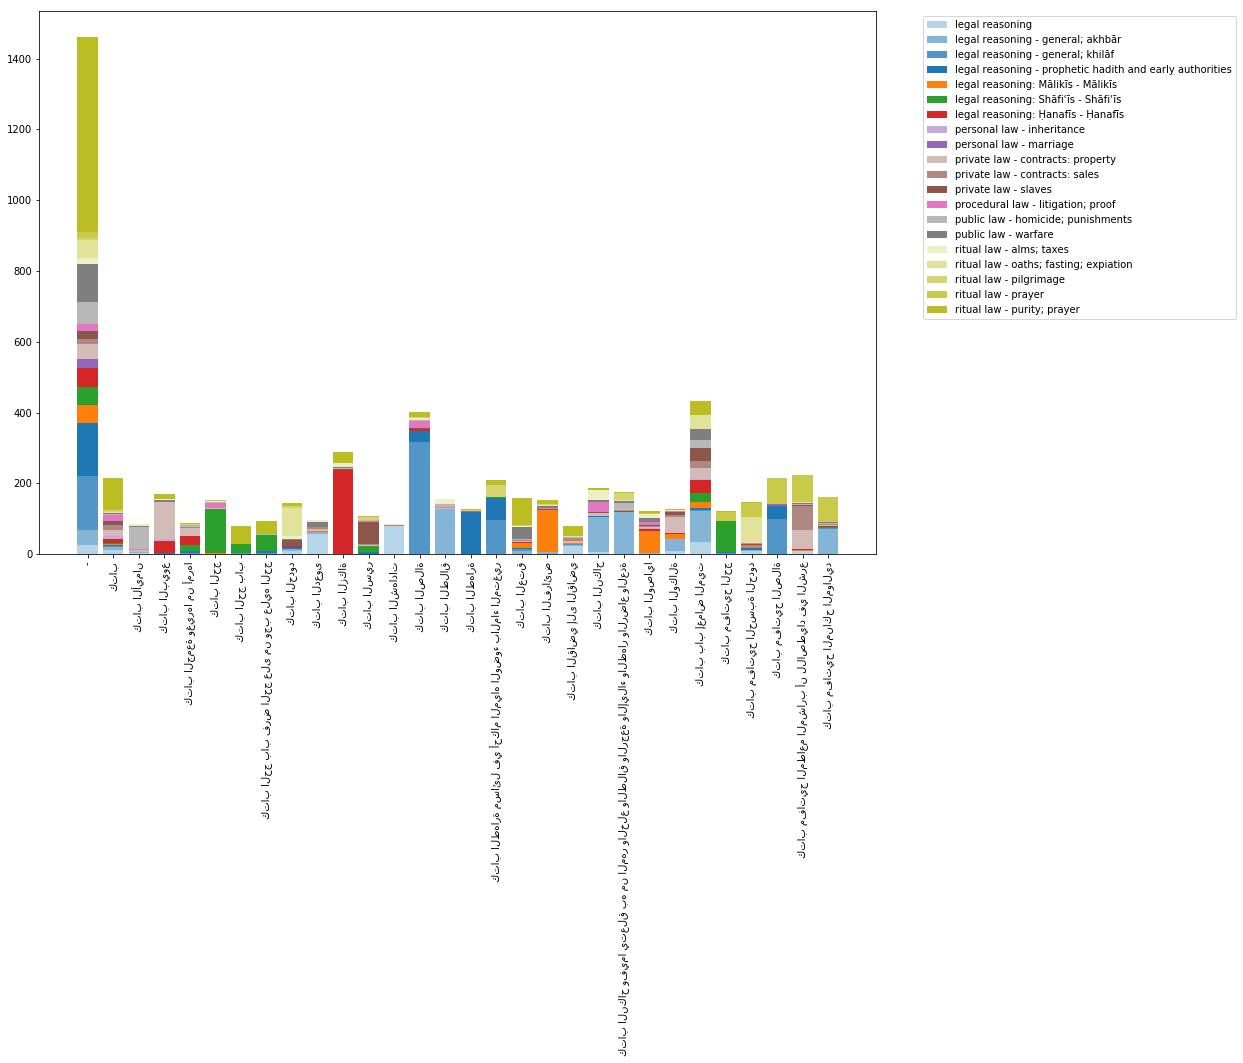

In [102]:
# The 30 most common volume names
voltitles = metadata_newind['Level1Title'].value_counts().head(30).index
meta_sub = metadata_newind[metadata_newind.Level1Title.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'Level1Title', reshape_col1=True, aggfunc=len)

0 باب
1 مسألة
2 باب السلم
3 باب الرجوع عن الشهادة
4 باب الصرف
5 باب حد القذف
6 باب ما
7 باب ما جاء في
8 باب موجبات الدية والعاقلة والكفارة تقدم الكلام على لفظ الدية في الباب قبله والعاقلة سموا بذلك لأنهم يعقلون الإبل بفناء دار القتيل وقيل لأنهم يمنعون عنه والعقل المنع وقيل لإعطائها العقل الذي هو الدية والكفارة مأخوذة من الكفر وهو الستر كما تقدم في بابها صاح على صبي لا يميز أي وكذا ضعيف التمييز كما قاله الإمام على طرف سطح أي أو بئر أو نهر فوقع بذلك فمات فدية مغلظة على العاقلة لأنه يتأثر بالصيحة الشديدة كثيرا فأحيل الهلاك عليها ولم يتعرض الجمهور للارتعاد وتعرض له الإمام والغزالي والرافعي وكأنه ملازم لهذه الحالة وفي قول قصاص لأن التأثير بها غالب وقياس القائل بهذا أن يوجب دية مغلظة على الجاني ولو كان الصبي المصيح عليه بأرض فمات أو صاح على بالغ بطرف سطح فسقط ومات فلا دية في الأصح لندرة الموت بذلك والحالة هذه والثاني تجب أما في الصبي فكما لو سقط من سطح وأما في البالغ فلأنه مع الغفلة كالصبي وشهر سلاح كصياح أي وكذا التهديد الشديد ومراهق متيقظ كبالغ أي فلا دية فيه على الأصح كما مضى فرع المجنون 

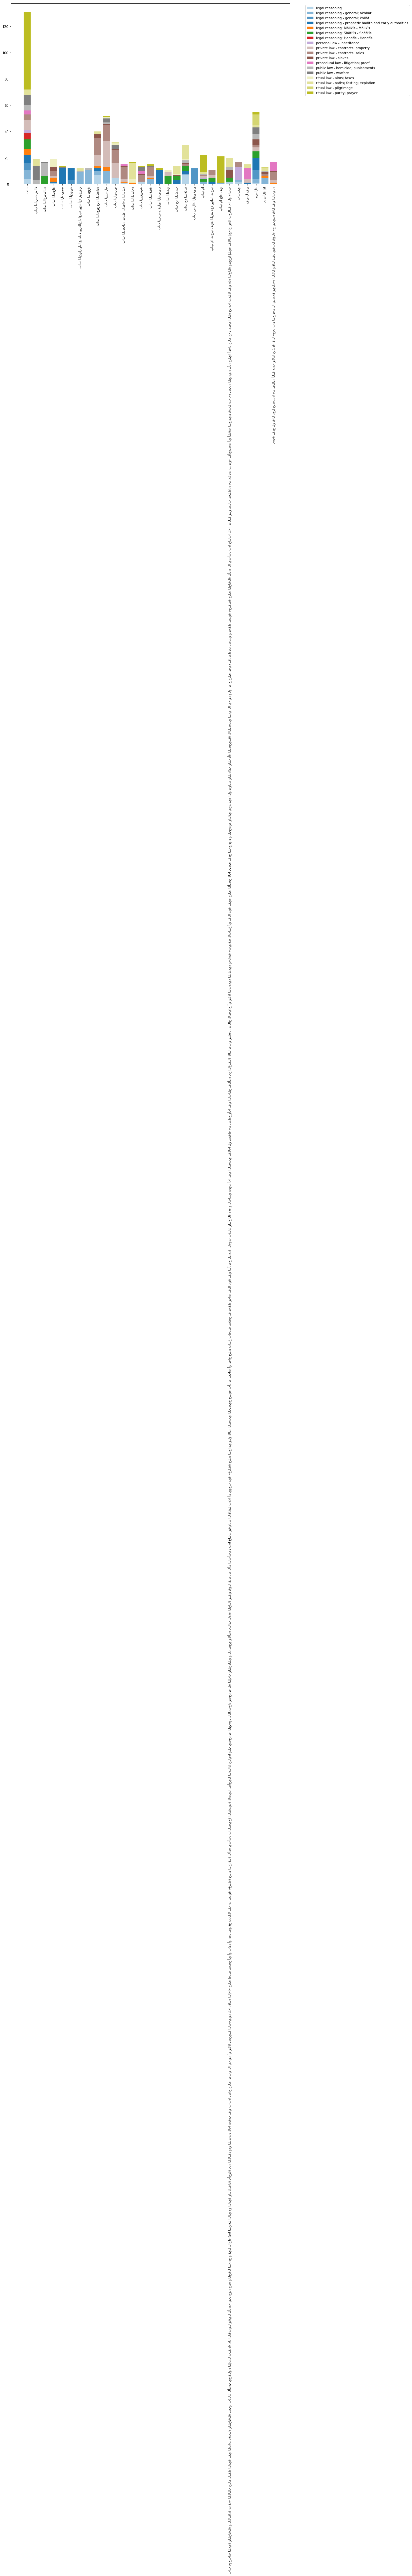

In [103]:
# The 30 most common chapter names
voltitles = metadata_newind['Level2Title'].value_counts().head(30)[1:].index
for i, v in enumerate(voltitles):
    print(i, v)
meta_sub = metadata_newind[metadata_newind.Level2Title.isin(voltitles)]
plot_bars_per_topic(meta_sub, topic_names, 'Level2Title', reshape_col1=True, aggfunc=len)